In [2]:
import pandas as pd
Df = pd.read_pickle('df.pkl')
print(Df.shape)
Df.head()

(30, 743)


,ID,Pfade,NeueSpalte_2,NeueSpalte_3,NeueSpalte_4,NeueSpalte_5,NeueSpalte_6,NeueSpalte_7,NeueSpalte_8,NeueSpalte_9,...,NeueSpalte_733,NeueSpalte_734,NeueSpalte_735,NeueSpalte_736,NeueSpalte_737,NeueSpalte_738,NeueSpalte_739,NeueSpalte_740,NeueSpalte_741,NeueSpalte_742
0,f_100307,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.842616,0.281377,0.145945,0.143361,0.136568,0.125769,-0.153299,0.489867,...,0.528217,0.552261,0.080016,-0.099528,0.550423,0.198592,-0.022323,0.080028,-0.165354,0.500013
1,f_105014,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.801185,0.31438,0.005703,0.028383,0.032578,0.170047,-0.149016,0.647706,...,0.601232,0.630362,0.452356,0.319196,0.559091,0.487466,0.36968,0.359345,0.286999,0.631849
2,f_117122,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.909063,0.475049,0.267137,0.418913,0.333262,0.318331,0.457528,0.611297,...,0.522906,0.701851,0.324999,0.246327,0.569567,0.335609,0.452695,0.362368,0.345511,0.751584
3,f_118528,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.766762,0.197657,-0.008234,0.113065,0.098727,0.078905,-0.147879,0.674439,...,0.533029,0.652959,0.305309,0.189316,0.50307,0.45867,0.465517,0.24414,0.168589,0.671725
4,f_120111,/Users/leoschild/Desktop/LEO/RSDS.nosync/Vorb_...,0.869413,0.108178,0.121637,0.073883,0.020967,0.130447,-0.014669,0.311112,...,0.461053,0.726004,0.433603,0.402498,0.563341,0.452181,0.411742,0.493374,0.531044,0.694649


In [3]:
Df.pop('Pfade') # removing Pfade from the dataframe
label = Df.pop('ID') # removing and saving ID from the dataframe into label 
Dataset = Df.values # converting the dataframe into numpy array

In [4]:
import numpy as np
import scipy.stats as stats

# the variable 'Dataset' contains the 2D array (10, 741)
P_value = np.empty(Dataset.shape[1]*2).reshape(741,2) # creating an array of zeros with the same length as the number of rows in the dataset
count = 0
for columns in Dataset.T:
    # Perform operations on each column
    diff = np.round((columns[:15]-columns[15:]).tolist(), 30) # subtracting the first five elements from the last five elements of the column
    P_value[count,:] = stats.wilcoxon(diff, alternative= "two-sided") # comparing the man and woman samples for every feature of the dataset
    count += 1 

In [5]:
(P_value[:,1]<0.05).sum()

36

In [6]:
print(P_value)
print(P_value.shape)

[[59.          0.97796631]
 [60.          1.        ]
 [49.          0.56140137]
 ...
 [46.          0.45428467]
 [29.          0.08325195]
 [43.          0.35913086]]
(741, 2)


In [7]:
p_value_fdr = stats.false_discovery_control(P_value[:,1], method='bh')

In [9]:
print(p_value_fdr)

[0.99954901 1.         0.92035047 0.92035047 0.96093222 0.96296572
 0.8858551  0.95440234 0.8858551  0.8858551  0.91015468 0.92035047
 0.85293223 0.93717319 0.95440234 0.98180389 0.85293223 0.8858551
 0.9734162  0.8858551  0.92035047 0.96093222 0.85293223 0.8858551
 0.90533249 0.98180389 0.96296572 0.90533249 0.8858551  0.8858551
 0.96093222 0.98180389 0.96296572 0.8858551  0.85293223 0.8858551
 0.98180389 0.8858551  0.92035047 0.98180389 0.8858551  0.98180389
 0.91015468 0.93717319 0.99590617 0.85293223 0.85293223 0.85293223
 0.96093222 0.85293223 0.85293223 0.8858551  1.         0.8858551
 0.98180389 1.         0.96296572 0.96093222 0.85293223 0.85293223
 0.85293223 0.85293223 0.8858551  0.9734162  0.99954901 0.85293223
 0.8858551  0.8858551  0.91015468 0.85293223 0.85293223 0.85293223
 0.8858551  0.96093222 0.8858551  0.85293223 0.85293223 0.85293223
 0.8858551  0.85293223 0.99954901 0.8858551  0.85293223 0.92035047
 0.85293223 0.87473228 0.8858551  0.8858551  0.99590617 0.8858551
 

In [7]:
import Feature_Reduction_Pipeline as FRP
red_feat = FRP.select_features(Df, 15)
Df[red_feat].shape

(30, 39)

In [16]:
from sklearn.manifold import TSNE

X_embedded= TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(Df)

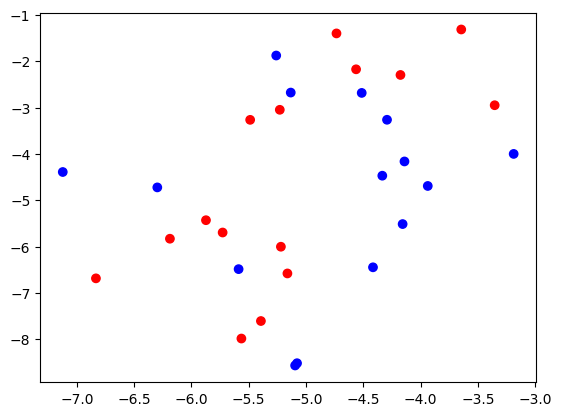

In [17]:
from matplotlib import pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = ['r', 'r', 'r', 'r', 'r','r', 'r', 'r', 'r', 'r','r', 'r', 'r', 'r', 'r','b', 'b', 'b', 'b', 'b','b', 'b', 'b', 'b', 'b','b', 'b', 'b', 'b', 'b'])